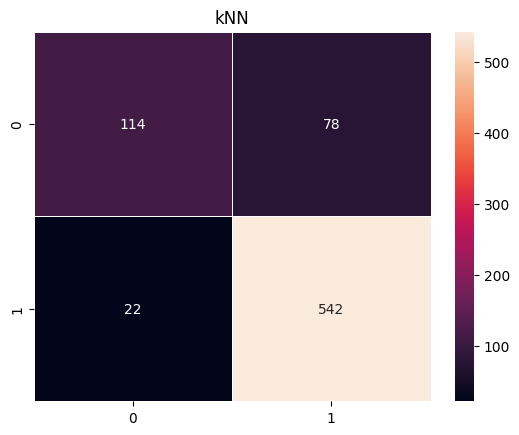

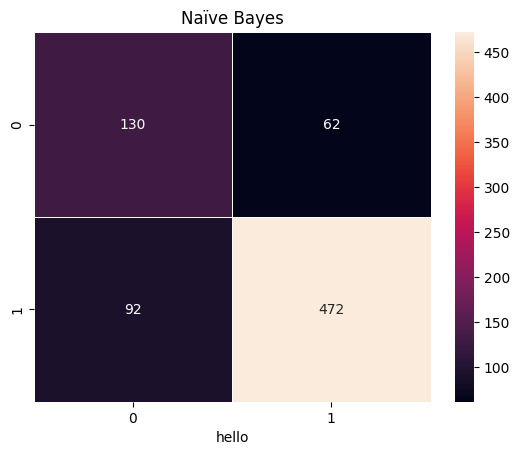

p1>p2? pval= 0.0024699859373606154
p1<p2? pval= 0.9975300140626394
p1!=p2? pval= 0.004939971874721231


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

cm_sum_knn = [[0, 0],[0, 0]]
cm_sum_gnb = [[0, 0],[0, 0]]
knn_acc = []
gnb_acc = []
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
X = df.drop('class', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['class']

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
knn = KNeighborsClassifier()
gnb = GaussianNB()

for train_index, test_index in skf.split(X, y):
     X_train, X_test, y_train, y_test = X[train_index], X[test_index],\
                                        y[train_index], y[test_index]
     
     knn.fit(X_train, y_train)
     y_pred_knn = knn.predict(X_test)
     cm_knn = confusion_matrix(y_test, y_pred_knn)
     knn_acc.append(accuracy_score(y_test, y_pred_knn))

     for i in range(2):
          for j in range(2):
               cm_sum_knn[i][j] += cm_knn[i][j]

     gnb.fit(X_train, y_train)
     y_pred_gnb = gnb.predict(X_test)
     cm_gnb = confusion_matrix(y_test, y_pred_gnb)
     gnb_acc.append(accuracy_score(y_test, y_pred_gnb))

     for i in range(2):
          for j in range(2):
               cm_sum_gnb[i][j] += cm_gnb[i][j]

f, ax = plt.subplots()
sns.heatmap(cm_sum_knn,annot = True, linewidths= 0.5, fmt="g")
plt.title('kNN')
plt.show()

sns.heatmap(cm_sum_gnb,annot = True, linewidths= 0.5, fmt="g")
plt.title('Naïve Bayes')
plt.show()

res = stats.ttest_rel(knn_acc, gnb_acc, alternative='greater')
print("p1>p2? pval=",res.pvalue)

res = stats.ttest_rel(knn_acc, gnb_acc, alternative='less')
print("p1<p2? pval=",res.pvalue)

res = stats.ttest_rel(knn_acc, gnb_acc, alternative='two-sided')
print("p1!=p2? pval=",res.pvalue)